In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"D:\GoIT\facebook_ads_data (2.0).csv")
df

,ad_date,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
0,2022-11-05,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
1,2022-11-01,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
2,2022-10-31,Expansion,227.45,6054,58,191.87,3.92,37.57,0.009580,0.843570
3,2022-10-30,Expansion,335.91,27562,69,472.61,4.87,12.19,0.002503,1.406954
4,2022-10-29,Expansion,714.03,33358,115,680.34,6.21,21.41,0.003447,0.952817
...,...,...,...,...,...,...,...,...,...,...
1489,2020-11-15,Discounts,6.98,12465,657,10.96,0.01,0.56,0.052708,1.570201
1490,2020-11-14,Discounts,7.27,5005,392,12.67,0.02,1.45,0.078322,1.742779
1491,2020-11-13,Discounts,6.36,11669,451,9.77,0.01,0.55,0.038649,1.536164
1492,2020-11-12,Discounts,23.00,10473,397,21.13,0.06,2.20,0.037907,0.918696


1. Group the data by day and create two charts for the grouped data:

A chart with daily ad spend in 2021;
A chart with daily ROMI in 2021. Display the moving average of spend and ROMI

In [3]:
daily_stats = df[(df['ad_date'] > '2020-12-31') & (df['ad_date'] < '2022-01-01')].groupby('ad_date')[['total_spend', 'total_impressions', 'total_clicks', 'total_value']].sum()
daily_stats

,total_spend,total_impressions,total_clicks,total_value
ad_date,,,,
2021-01-01,0.39,353,0,0.59
2021-01-02,7.74,10709,205,6.90
2021-01-04,70.06,22440,1256,68.47
2021-01-05,81.15,60232,1379,61.68
2021-01-06,142.77,65265,431,145.97
...,...,...,...,...
2021-12-27,478.31,103725,504,686.47
2021-12-28,359.83,101788,499,450.47
2021-12-29,163.25,32290,435,171.76


Daily advertising spend in 2021

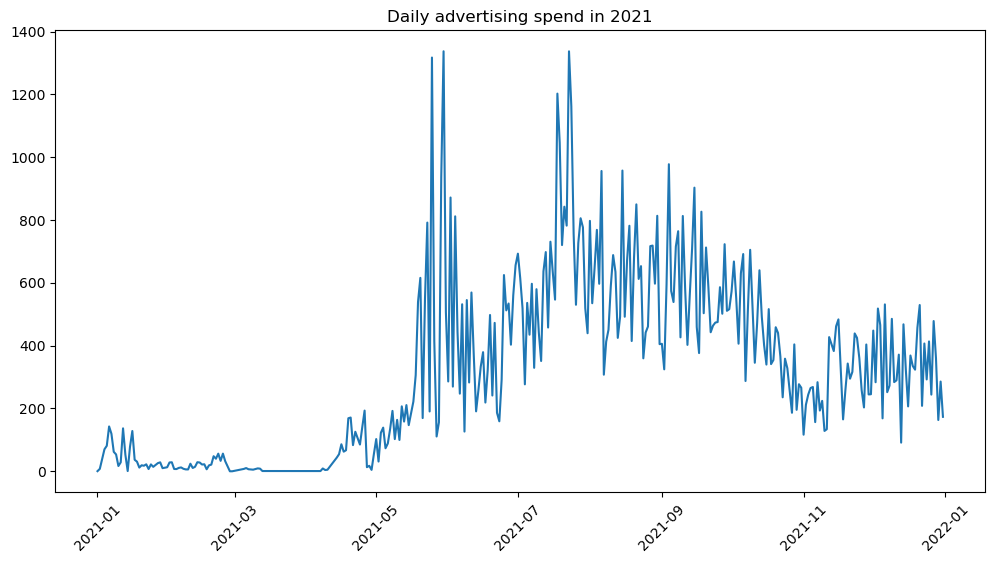

In [85]:

daily_stats = daily_stats.reset_index()
daily_stats['ad_date'] = pd.to_datetime(daily_stats['ad_date'])
plt.figure(figsize=(12, 6))
plt.title('Daily advertising spend in 2021')
plt.plot(daily_stats['ad_date'], daily_stats['total_spend'], label='Total spend')
plt.xticks(rotation=45)
plt.show()

Daily ROMI in 2021

In [7]:

daily_stats['romi'] = daily_stats['total_value'] / daily_stats['total_spend']

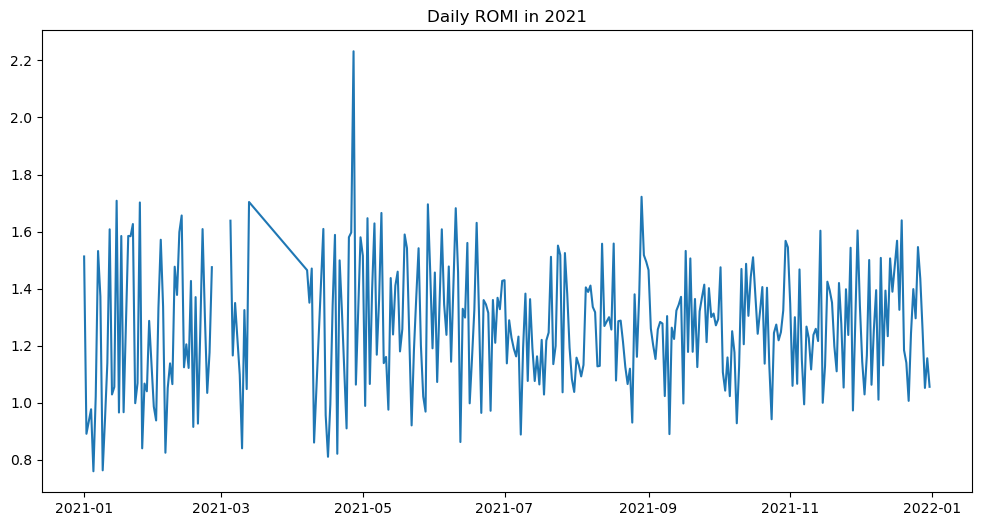

In [91]:
plt.figure(figsize=(12, 6))
plt.plot(daily_stats['ad_date'], daily_stats['romi'], label='ROMI')
plt.title('Daily ROMI in 2021')
plt.show()

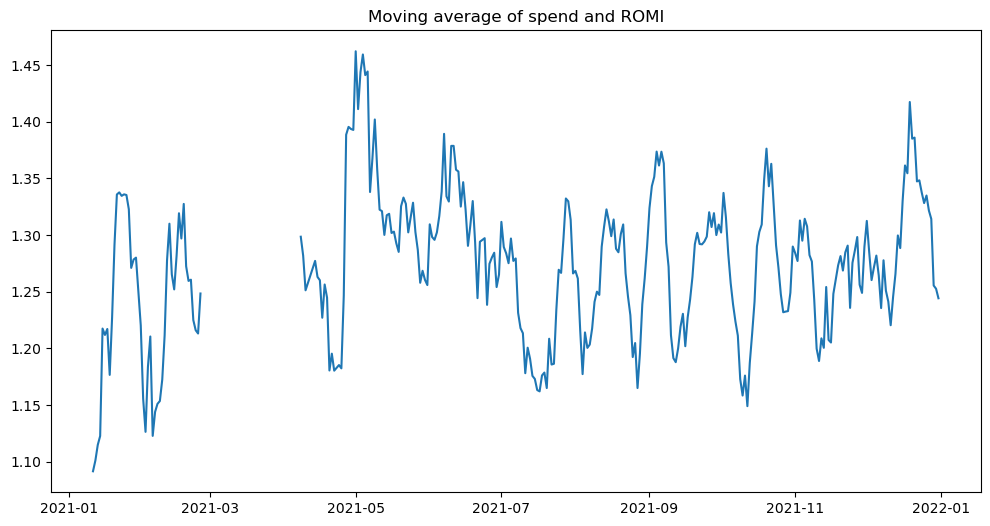

In [95]:
plt.figure(figsize=(12, 6))
plt.plot(daily_stats['ad_date'], daily_stats['romi'].rolling(10).mean(), label='Total spend')
plt.title('Moving average of spend and ROMI')
plt.show()

2. Group the data by campaign name and create two charts:

A chart of the total advertising spend in each campaign;
The total ROMI in each campaign.

In [38]:
campaign_stats = df.groupby('campaign_name', as_index=False)[['total_spend', 'total_impressions', 'total_clicks', 'total_value']].sum()
campaign_stats

,campaign_name,total_spend,total_impressions,total_clicks,total_value
0,Brand,539.92,893854,542,670.15
1,Crazy discounts,2175.29,1401511,19627,2583.59
2,Discounts,2856.39,1256069,33353,3516.27
3,Electronics,23920.42,7070770,51593,29169.38
4,Expansion,67212.82,3736092,37469,83288.66
5,Hobbies,11326.97,8146187,50611,13974.63
6,Lookalike,63631.09,21019388,220993,80234.70
7,New items,2936.97,1045294,16935,3742.05
8,Promos,4993.84,2216422,17315,8793.77
9,Trendy,1992.31,1392189,9725,3798.90


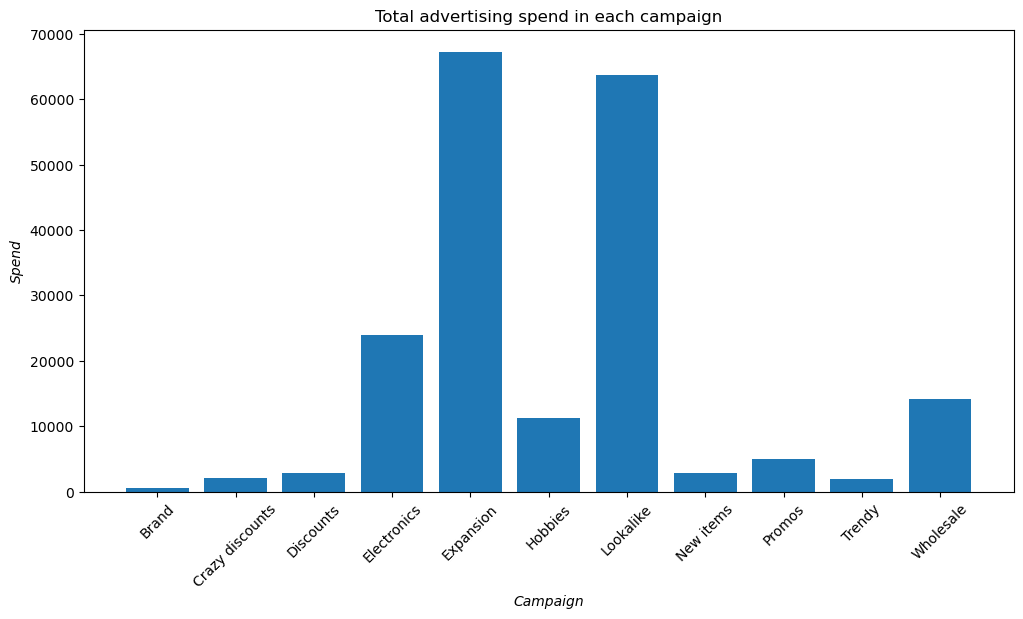

In [97]:
plt.figure(figsize=(12, 6))
plt.bar(campaign_stats['campaign_name'], campaign_stats['total_spend'])
plt.title('Total advertising spend in each campaign')
plt.xlabel('Campaign', fontstyle='italic')
plt.ylabel('Spend', fontstyle='italic')
plt.xticks(rotation=45)
plt.show()

In [42]:

campaign_stats['romi'] = campaign_stats['total_value'] / campaign_stats['total_spend']

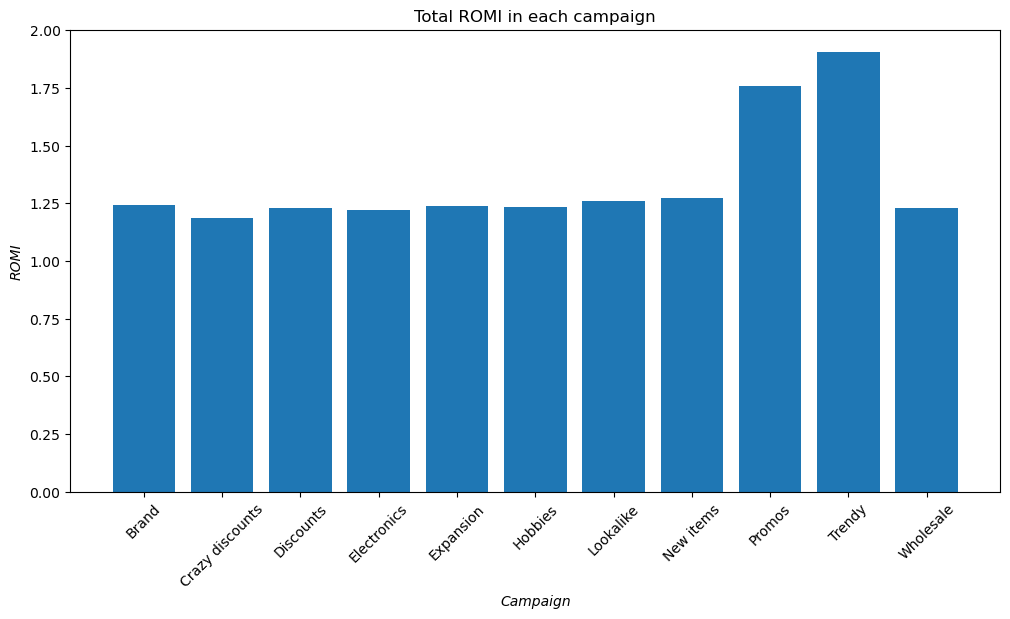

In [99]:
plt.figure(figsize=(12, 6))
plt.bar(campaign_stats['campaign_name'], campaign_stats['romi'])
plt.title('Total ROMI in each campaign')
plt.xlabel('Campaign', fontstyle='italic')
plt.ylabel('ROMI', fontstyle='italic')
plt.xticks(rotation=45)
plt.show()

3. Using a box plot, determine the spread of daily ROMI in each campaign (by campaign name.)

In [53]:
# Check if any invalid values exist
print(campaign_stats[['romi', 'campaign_name']].head())


       romi    campaign_name
0  1.241202            Brand
1  1.187699  Crazy discounts
2  1.231019        Discounts
3  1.219434      Electronics
4  1.239178        Expansion


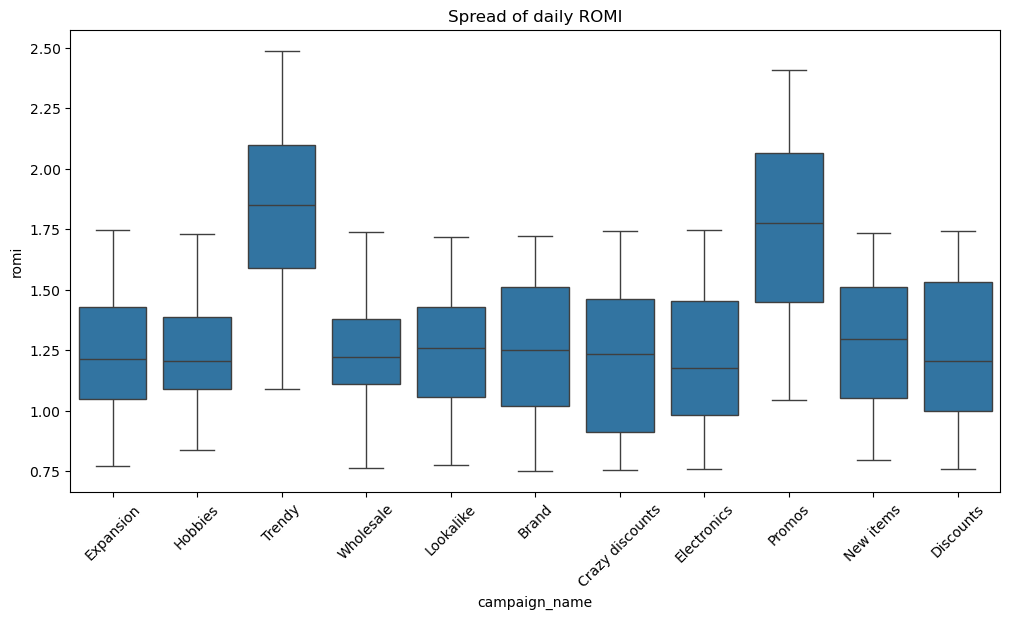

In [103]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="campaign_name", y="romi", data=df)
plt.title('Spread of daily ROMI')
plt.xticks(rotation=45)
plt.show()

4. Build a histogram with the distribution of ROMI values ​​in the table facebook_ads_data.csv

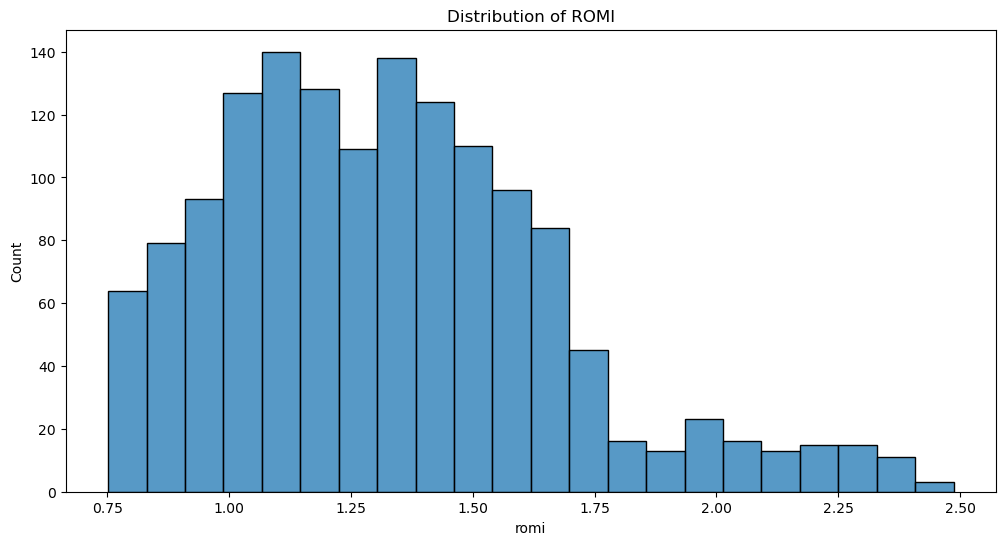

In [107]:
plt.figure(figsize=(12, 6))
sns.histplot(df, x="romi")
plt.title('Distribution of ROMI')
plt.show()

5. Create a heatmap of the correlation between all the numeric metrics in the facebook_ads_data.csv table.

   Which metrics have the highest and lowest correlation? - Highest Correlation: total_spend with total_value. Lowest Correlation: total_impressions with total_spend

   What does "total_value" correlate with? -total_value is positively correlated with total_spend, total_impressions, and total_clicks

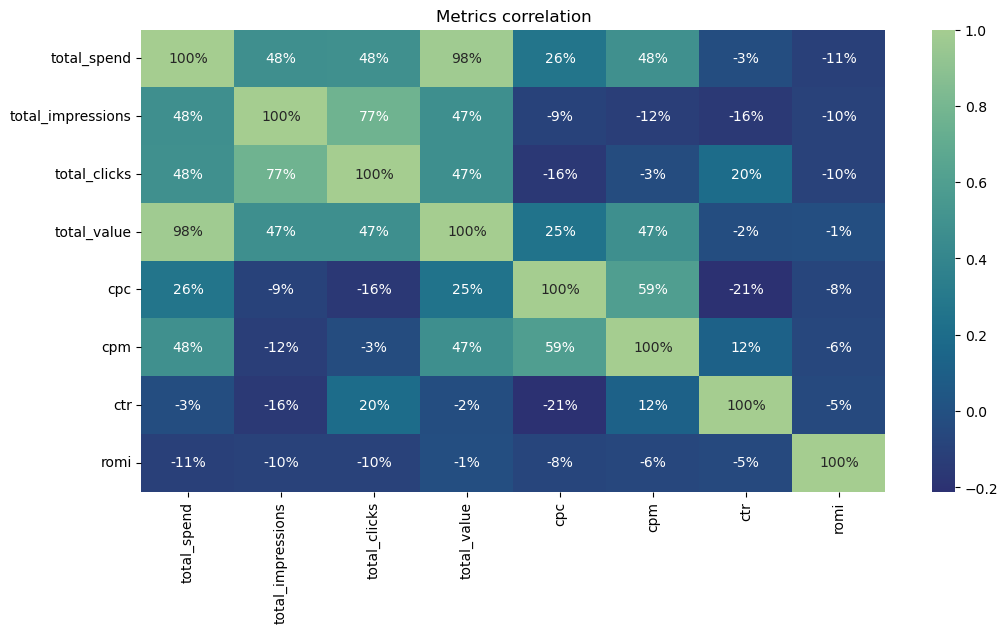

In [113]:
metrics_corr = df.loc[:, 'total_spend':].corr()

cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.figure(figsize=(12, 6))
sns.heatmap(metrics_corr, annot=True, fmt='.0%', cmap = 'crest_r')
plt.title('Metrics correlation')
plt.show()

6. Build a scatter plot with a linear regression based on the data from "total_spend" and "total_value" to visualize the relationship between these values.

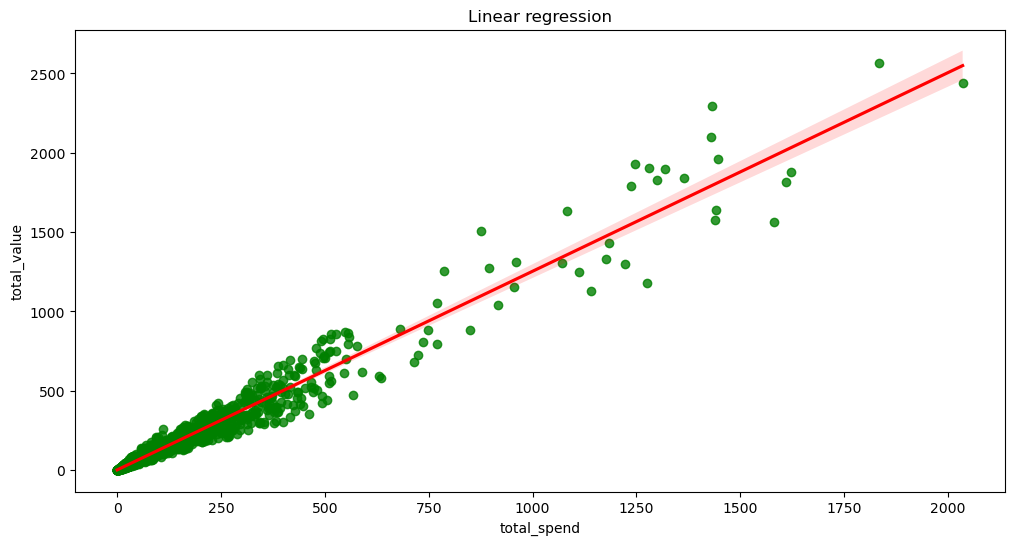

In [115]:
plt.figure(figsize=(12, 6))
sns.regplot(df, x='total_spend', y='total_value', scatter_kws={'color':'g'}, line_kws={'color':'red'})
plt.title('Linear regression')
plt.show()